In [1]:
import numpy as np
import pandas as pd
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'scipy'

# Diagramas

En la estadistica es muy común el uso de representaciones visuales para mostrar el comportamiendo de los datos, las cuales seran mostradas a continuación.

## Histograma

```{admonition} Definición
Un **histograma** es una representación gráfica de una variable en forma de barras en la cual, la superficie de la barra es proporsional a la *frecuencia* de los valores representados. Son utiles por que sirven para obtener un panorama general de la forma como se distribuyen los datos.
```
La construcción de un histograms depende del tipo de datos que se esten empleando (discretos o continuos) tal y como de describe a continuación.

### Histograma a partir de datos discretos 
 
En primer lugar, se determinan la *frecuencia* y la *frecuencia* relativa de cada valor $x_i$. Luego se marcan los valores $x_i$ posibles en una escala horizontal. Sobre cada valor se traza un rectángulo cuya altura es la frecuencia relativa (o alternativamente, la frecuencia) de dicho valor: Los rectángulos deben medir lo mismo de ancho.

**Ejemplo**: ¿Qué tan inusual es un juego de beisbol sin [hit](https://es.wikipedia.org/wiki/Hit_(b%C3%A9isbol)) o de un hit en las ligas mayores y cuán frecuentemente un equipo pega más de 10, 15 o incluso 20 hits? La siguiente tabla muestra el numero de hits conectados por equipo y por juego de todos los juegos de nueve episodios que se jugaron entre 1989 y 1993. (**Nota**: Este ejemplo fue tomado del libro **Probabilidad y estadistica para Ciencias e Ingenieria** (Jay L. Devore)).

|Hits/juego|Numero de juegos|
|---|---|
|0 | 20 | 
|1 | 72 | 
|2 | 209 | 
|3 | 527 | 
|4 | 1048 | 
|5 | 1457 | 
|6 | 1988 | 
|7 | 2256 | 
|8 | 2403 | 
|9 | 2256 | 
|10 | 1967 | 
|11 | 1509 | 
|12 | 1230 | 
|13 | 834 | 
|14 | 569 | 
|15 | 393 | 
|16 | 253 | 
|17 | 171 | 
|18 | 97 | 
|19 | 53 | 
|20 | 31 | 
|21 | 19 | 
|22 | 13 | 
|23 | 5 | 
|24 | 1 | 
|25 | 0 | 
|26 | 1 | 
|27 | 1 | 

Se pide:
1. Defina el DataFrame asociado a la tabla
2. Calcule la frecuencia relativa.
3. Dibuje el histograma.

In [2]:
# 1
raw_data = {"hits_per_game":np.arange(28),
            "games": [20, 72, 209, 527, 1048, 1457, 1988, 2256, 2403, 
                      2256, 1967, 1509, 1230, 834, 569, 393, 253, 171, 
                      97, 53, 31, 19, 13, 5, 1, 0, 1, 1]
           }

df = pd.DataFrame(raw_data, columns = raw_data.keys())
df


,hits_per_game,games
0,0,20
1,1,72
2,2,209
3,3,527
4,4,1048
5,5,1457
6,6,1988
7,7,2256
8,8,2403
9,9,2256


In [4]:
# 2
df_freq = df.copy()
df_freq['freq_rel']= df['games']/df['games'].sum()
df_freq

,hits_per_game,games,freq_rel
0,0,20,0.001032
1,1,72,0.003715
2,2,209,0.010783
3,3,527,0.027189
4,4,1048,0.054068
5,5,1457,0.075169
6,6,1988,0.102564
7,7,2256,0.116391
8,8,2403,0.123975
9,9,2256,0.116391


In [6]:
print("Catidad total de juegos", df_freq['games'].sum())
print("Suma de las frecuencias", df_freq['freq_rel'].sum())

Catidad total de juegos 19383
Suma de las frecuencias 1.0


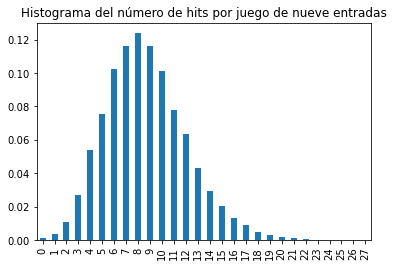

In [12]:
# Ya se han contado los elementos (se uso pandas para el histograma) 
df_freq['freq_rel'].plot(kind='bar', title ='Histograma del número de hits por juego de nueve entradas');


### Histograma a partir de datos continuos
En este caso, se divide el eje de medición entre un número adecuado de **intervalos de clase o clases** (**bins**). Cuando el ancho de las clases es el mismo, lo que se hace es determinar la frecuencia y la frecuencia relativa de cada clase contando la cantidad de muestras que se encuentran dentro de cada intervalo y usando frecuencia relativa como la altura del correspondiente intervalo.

**Ejemplo**: Los siguientes datos muestran la cantidad de horas dedicadas a jugar juegos de video de un grupo de estudiantes.

```
9.95  10  2.25  16.75  0
19.5  22.5  7.5  15  12.75
5.5  11	 10  20.75  17.5
23  21.9  24  23.75  18
20  15  22.9  18.8  20.5
```

Construya un histograma agrupando los datos en cinco clases.

#### Solución empleando Matplotlib

In [13]:
# --- Usando Numpy ---
# Creacion de la tabla
data = np.array([9.95, 10, 2.25, 16.75, 0, 19.5, 22.5, 7.5, 15, 12.75,
        5.5, 11, 10, 20.75, 17.5, 23, 21.9, 24, 23.75, 18,
        20, 15, 22.9, 18.8, 20.5])
data

array([ 9.95, 10.  ,  2.25, 16.75,  0.  , 19.5 , 22.5 ,  7.5 , 15.  ,
       12.75,  5.5 , 11.  , 10.  , 20.75, 17.5 , 23.  , 21.9 , 24.  ,
       23.75, 18.  , 20.  , 15.  , 22.9 , 18.8 , 20.5 ])

In [14]:
# Histograma de cinco grupos
hist = np.histogram(data, bins=5)
hist

(array([ 2,  2,  5,  6, 10], dtype=int64),
 array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. ]))

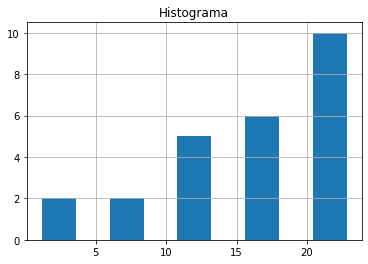

In [32]:
# Grafica del histograma usando Matplotlib
fig, ax = plt.subplots()
#
ax.grid(True)
ax.hist(data, bins=5,histtype='bar', rwidth=0.5)
ax.set_title('Histograma'); # Nota: Es necesario dar mas contexto al histograma

In [ ]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)